# Importing necessary libraries 

In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob
import math 
import sys
import statistics as stats

# Import csv files

In [2]:
movie_budgets = pd.read_csv('movie_budgets_clean.csv')
rt_movie = pd.read_csv('rt_movie_clean.csv')

In [3]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 8 columns):
Unnamed: 0      1560 non-null int64
id              1560 non-null int64
synopsis        1498 non-null object
rating          1557 non-null object
genre           1552 non-null object
director        1361 non-null object
writer          1111 non-null object
theater_date    1201 non-null object
dtypes: int64(2), object(6)
memory usage: 97.6+ KB


## Additional data cleaning

In [4]:
rt_movie = rt_movie.drop(['writer'], axis = 1)
rt_movie = rt_movie.drop(['director'], axis = 1)
rt_movie = rt_movie.drop(['synopsis'], axis = 1)

In [5]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 5 columns):
Unnamed: 0      1560 non-null int64
id              1560 non-null int64
rating          1557 non-null object
genre           1552 non-null object
theater_date    1201 non-null object
dtypes: int64(2), object(3)
memory usage: 61.1+ KB


In [6]:
rt_movie = rt_movie.dropna()

In [7]:
rt_movie.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1201 entries, 0 to 1559
Data columns (total 5 columns):
Unnamed: 0      1201 non-null int64
id              1201 non-null int64
rating          1201 non-null object
genre           1201 non-null object
theater_date    1201 non-null object
dtypes: int64(2), object(3)
memory usage: 56.3+ KB


### Display data frames

In [8]:
display(movie_budgets.head())
rt_movie.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


,Unnamed: 0,id,rating,genre,theater_date
0,0,1,R,Action and Adventure|Classics|Drama,"Oct 9, 1971"
1,1,3,R,Drama|Science Fiction and Fantasy,"Aug 17, 2012"
2,2,5,R,Drama|Musical and Performing Arts,"Sep 13, 1996"
3,3,6,R,Drama|Mystery and Suspense,"Dec 9, 1994"
5,5,8,PG,Drama|Kids and Family,"Mar 3, 2000"


# Data Analysis

In [9]:
rt_date_count = rt_movie.groupby('theater_date').count()

In [10]:
rt_date_count.loc[rt_date_count['rating'] == 1]

,Unnamed: 0,id,rating,genre
theater_date,,,,
"Apr 1, 1952",1,1,1,1
"Apr 1, 1975",1,1,1,1
"Apr 1, 1976",1,1,1,1
"Apr 1, 1981",1,1,1,1
"Apr 1, 1982",1,1,1,1
...,...,...,...,...
"Sep 8, 1996",1,1,1,1
"Sep 8, 2000",1,1,1,1
"Sep 9, 1986",1,1,1,1


In [11]:
movie_date_count = movie_budgets.groupby('release_date').count()

In [12]:
movie_date_count = movie_date_count.loc[movie_date_count['movie'] == 1]

In [13]:
movie_date_count = movie_date_count.reset_index()

In [14]:
movie_date_count

,release_date,id,movie,production_budget,domestic_gross,worldwide_gross
0,"Apr 1, 1988",1,1,1,1,1
1,"Apr 1, 1996",1,1,1,1,1
2,"Apr 1, 2005",1,1,1,1,1
3,"Apr 1, 2010",1,1,1,1,1
4,"Apr 1, 2015",1,1,1,1,1
...,...,...,...,...,...,...
991,"Sep 6, 1935",1,1,1,1,1
992,"Sep 6, 1996",1,1,1,1,1
993,"Sep 7, 2018",1,1,1,1,1
994,"Sep 8, 1989",1,1,1,1,1


In [15]:
#movie_budgets[movie_budgets['release_date'] in list(movie_date_count['release_date'])]

In [16]:
#movie_budgets = movie_budgets.loc[movie_date_count['release_date'].isin(list(movie_budgets['release_date']))]

## Merged data frame

In [31]:
merged_df= rt_movie.merge(movie_budgets, left_on='theater_date', right_on='release_date', how='inner')

In [34]:
#creates only uniques dates
duplicated_dates= merged_df.drop_duplicates(subset=['theater_date'], keep= 'first', inplace=True)

In [100]:
merged_df['roi'] = (merged_df['worldwide_gross'] / merged_df['production_budget'] ) -1

## Formatting df columns into unique dictionaries

### Creating list of selected column

In [36]:
full_genre = list(merged_df['genre'].map(lambda x: x.split('|')))

In [37]:
genre = []
for i in full_genre:
    genre.append(i[0])

In [38]:
rating= list(merged_df['rating'])
roi = list(merged_df['roi'])
print(set(rating))
set(genre)


{'NC17', 'G', 'PG-13', 'PG', 'NR', 'R'}


{'Action and Adventure',
 'Animation',
 'Art House and International',
 'Classics',
 'Comedy',
 'Documentary',
 'Drama',
 'Horror',
 'Kids and Family',
 'Mystery and Suspense'}

In [39]:
full = zip(genre, rating, roi)
full= list(full)

### Sepreating list by genre and corresponding rating ROI

In [40]:
Action_and_Adventure=[]
Animation=[]
Art_House_and_International=[]
Classics=[]
Comedy=[]
Documentary=[]
Drama=[]
Horror=[]
Kids_and_Family=[]
Mystery_and_Suspense=[]
Science_Fiction_and_Fantasy=[]


for tup in full:
    if tup[0] == 'Action and Adventure':
        Action_and_Adventure.append(tup[1:])
        
    elif tup[0] == 'Animation':
        Animation.append(tup[1:])
        
    elif tup[0] == 'Art House and International':
        Art_House_and_International.append(tup[1:])
        
    elif tup[0] == 'Classics':
        Classics.append(tup[1:])
        
    elif tup[0] == 'Comedy':
        Comedy.append(tup[1:])
        
    elif tup[0] == 'Documentary':
        Documentary.append(tup[1:])
        
    elif tup[0] == 'Drama':
        Drama.append(tup[1:])
        
    elif tup[0] == 'Horror':
        Horror.append(tup[1:])
        
    elif tup[0] == 'Kids and Family':
        Kids_and_Family.append(tup[1:])
        
    elif tup[0] == 'Mystery and Suspense':
        Mystery_and_Suspense.append(tup[1:])
        
    else:
        Science_Fiction_and_Fantasy.append(tup[1:])

        

In [41]:
def mean_rating(db):
    new={}
    G=[]
    PG=[]
    PG_13=[]
    R=[]
    NR=[]
    NC17=[]
    for i in db:
            if i[0] == 'G':
                G.append(i[1])
                if G != 0:
                    new['G']=stats.mean(G)
            elif i[0] == 'PG':
                PG.append(i[1])
                if PG != 0:
                    new['PG']=stats.mean(PG)
            elif i[0] == 'PG-13':
                PG_13.append(i[1]) 
                if PG_13 != 0:
                    new['PG-13']=stats.mean(PG_13)
            elif i[0] == 'R':
                R.append(i[1])  
                if R != 0:
                    new['R']= stats.mean(R)
            elif i[0] == 'NR':
                NR.append(i[1]) 
                if NR != 0:
                    new['NR']=stats.mean(NR)
            else:
                NC17.append(i[1]) 
                if NC17 != 0:
                     new['NC17']=stats.mean(NC17) 
    return new


In [42]:
Action_and_Adventure = mean_rating(Action_and_Adventure)
Animation = mean_rating(Animation)
Art_House_and_International = mean_rating(Art_House_and_International)
Classics = mean_rating(Classics)
Comedy = mean_rating(Comedy)
Documentary = mean_rating(Documentary)
Drama = mean_rating(Drama)
Horror = mean_rating(Horror)
Kids_and_Family = mean_rating(Kids_and_Family)
Mystery_and_Suspense = mean_rating(Mystery_and_Suspense)
Science_Fiction_and_Fantasy = mean_rating(Science_Fiction_and_Fantasy)




In [43]:
cats = [Action_and_Adventure,
Animation,
Art_House_and_International,
Classics,
Comedy,
Documentary,
Drama,
Horror,
Kids_and_Family,
Mystery_and_Suspense,
Science_Fiction_and_Fantasy]



cats_string =['Action_and_Adventure',
'Animation',
'Art_House_and_International',
'Classics',
'Comedy',
'Documentary',
'Drama',
'Horror',
'Kids_and_Family',
'Mystery_and_Suspense',
'Science_Fiction_and_Fantasy']

## subplots on rating and genre

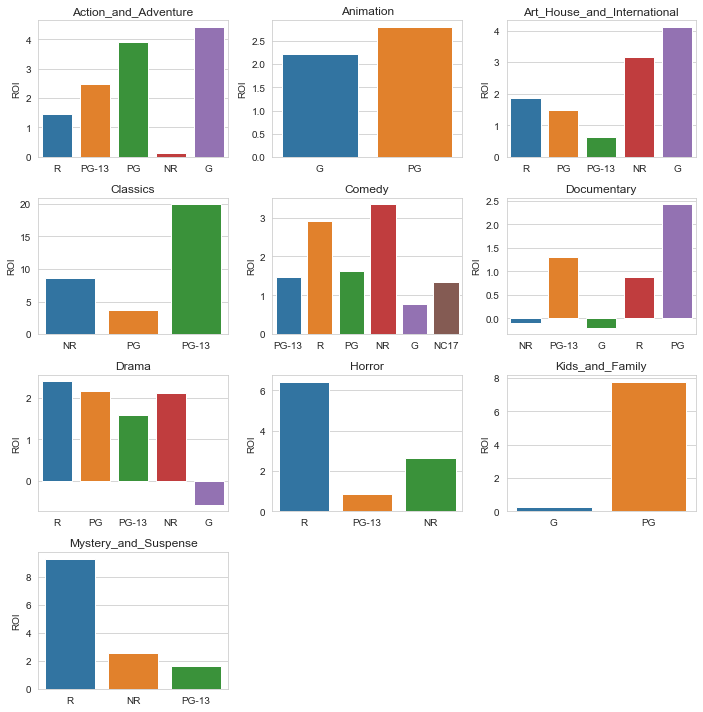

In [97]:
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(10,10))
for n in range(1,11):#(1,12) if keeping duplicates
    row=(n-1) // 3
    col=n%3-1
    ax= axes[row][col]
    x= list(cats[n-1].keys())
    y= list(cats[n-1].values())
    
    ax.set_title(cats_string[n-1])
    ax.set_ylabel('ROI')
   
    
    sns.set_style("whitegrid")
    fig.tight_layout()
    
    sns.barplot(x=x, y= y, ax=ax);
for n in range(10,12):
    row=(n-1) // 3
    col=n%3-3
    ax= axes[row][col]
    fig.delaxes(ax) 